Let D be our dataset sampled from $P(X,Y)$ where X is the feature vector and Y is the label vector.

Since every point pair $(x,y)$ is sampled from D i.i.d  we can write the $P(X,Y)$ as 

$$P(X,Y) = \prod_{i=1}^{n} P(x_i,y_i)$$

where $n$ is the number of points in D.This is the same as saying how many times we got head in n toin cosses.

Similar to coin example in 1D we can estimate the probability of $P(X,Y)$ as 

$\hat{P}(X,Y) = \frac{\sum_{i=1}^{n} I(x_i =x,y_i =y)}{n}$ where $I(x_i,y_i) = 1$ if both of them are true and 0 otherwise.

If we are trying to predict the label $y$ for a new point $x$  that means we are interested in finding $P(y|x)$.

Using conditional probability formula we can write $P(y|x)$ as:

$$P(y|x) = \frac{P(x,y)}{P(x)} = \frac{\sum_{i=1}^{n} I(x_i=x,y_i=y)}{\sum_{i=1}^{n} I(x_i=x)}$$

Similary this same as saying in all of the examples that we got X how many of them had label Y .












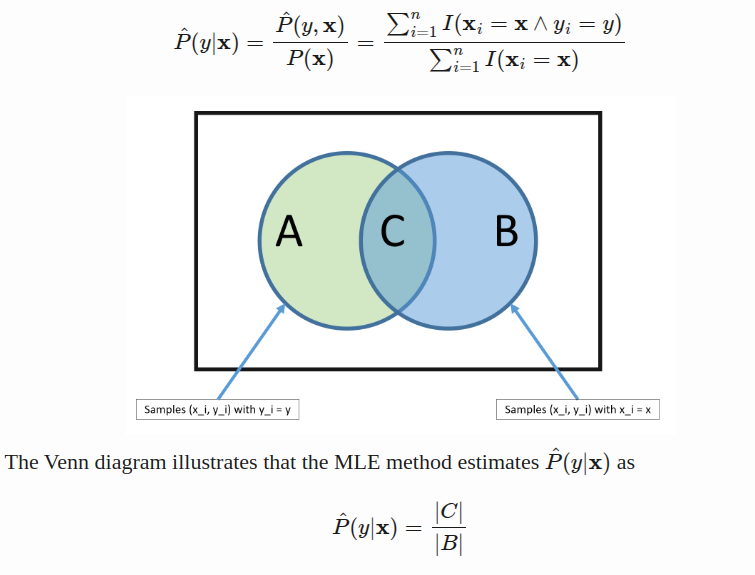

In [1]:
from IPython.display import Image
Image(filename='images/naivebayes1.png')


Problem with this is that we are counting how many times that exact X occurs and then we are finding how many times Y occured based on that but in really high dimensions it is very unlikely to see the exact same X. For example $x_1=(1,2,3,4,5,6,7,8,9.1,10)$ and $x_2=(1,2,3,4,5,6,7,8,9.2,10)$ will be treated as different.

That is where we make Naive Bayes Assumption. We assume that all the features are  condiitonally independent of each other given the label.

$$P(x|y) = \prod_{i=1}^{d} P(x_i|y)$$

where $d$ is the dimension of the feature vector.

In a spam filter example we are saying that each word is independent of each other.

Even though this is not true it works surprisingly well.

There are 3 cases for predicting $P(x|y)$

1. Categorical Features.
2. Multinomial Features.
3. Continuous Features.










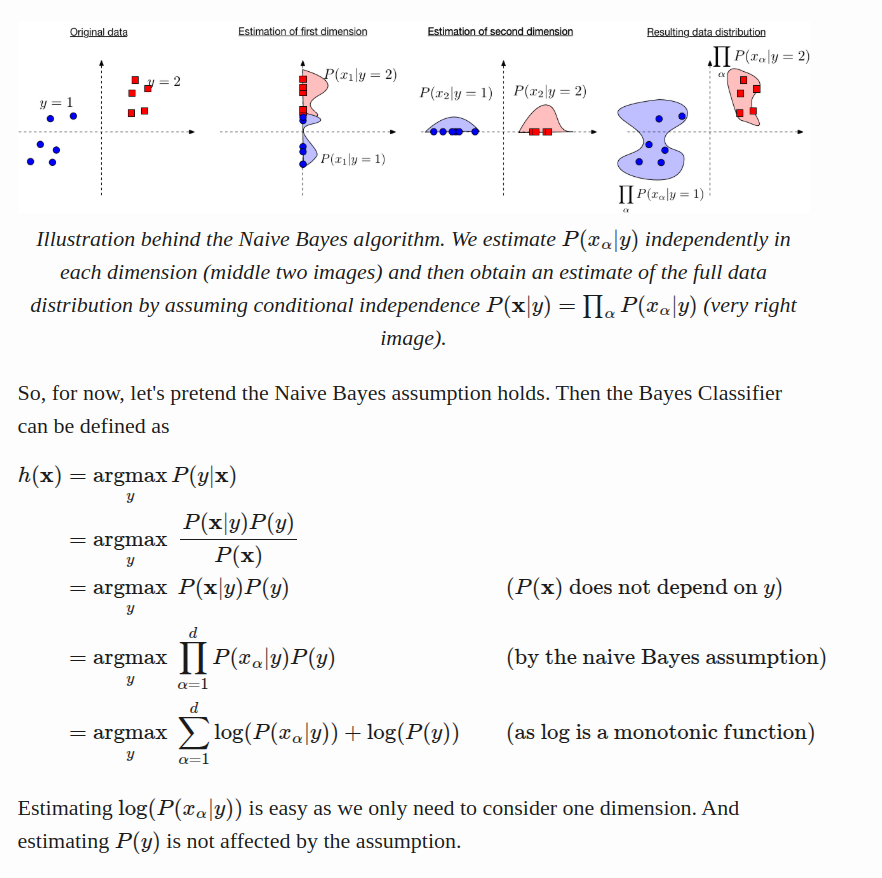

In [3]:
Image(filename='images/naivebayes2.png')

#### Categorical Features


We are saying that each feature is categorical and there exists a P(x_i|y) associated with each feature i

Model :

 $P(x_{\alpha}=j|y=c) = [\theta_{jc}]_{\alpha}$ where $\theta_{jc}$ is the probability of feature $\alpha$ taking value $j$ given that the label is $c$.


 But how do we estimate $\theta_{jc}$? By just counting the number of times feature $\alpha$ takes value $j$ given that the label is $c$ and dividing it by the total number of times the label is $c$.
 
#  $[\theta_{jc}]_{\alpha} = \frac{\sum_{i=1}^n \mathbb{1}[x_{i\alpha}=j]\mathbb{1}[y_i=c] + l}{\sum_{i=1}^n \mathbb{1}[y_i=c] + K_a*l}$


if 

$l=0$ it is MLE

$l=1$ it is Laplace Smoothing

$l >= 0$  it is MAP










In the end with categorical features :

$\arg\max_y P(y|x) = \arg\max_y P(y) \prod_{i=1}^d [\theta_{jc}]_{\alpha}$



### Multinomial Features

Instead of saying there is a probability distribution of each categorical variable we are saying that there is one distrbution for all of them and we are assuming we are independently sampling each feature from that distribution. This approach helps us to count the number of times each feature takes on a certain value.

Let $x_i$ be the number of times feature $\alpha$ takes on a certain value.

then 

$x_i \in \{1,\ldots,m\}$

If we model $P(x|y)$ as a multinomial distribution we can write it as:

$P(x|y) = \prod_{i=1}^d \text{Multinomial}(x_i|\phi_{yc})$

where $\phi_{yc}$ is the probability of feature $\alpha$ taking on a certain value $j$ given that the label is $c$.


more formally:

$P(x|y) = \frac{m!}{\prod_{i=1}^d x_i!} \prod_{i=1}^d \theta_{ac_{(x_i)}}$ where $\theta_{ac_{(x_i)}}$ is the probability of feature $\alpha$ taking on a certain value $j$ given that the label is $c$.It is found by taking ratio of howe many times that occured with the sequence length of  m 










### Continuous Features

and in here we assume all of the features are sampled from a normal distribution.

$P(x_{\alpha}|y=c) = {N}(\mu_{yc},\sigma_{yc})$

where $\mu_{yc}$ is the mean of the feature $\alpha$ given that the label is $c$ and $\sigma_{yc}$ is the standard deviation of the feature $\alpha$ given that the label is $c$.

Intutitvely we find this mean and variance by counting the number of times that feature $\alpha$ takes on a certain value given that the label is $c$ and then dividing it by the total number of times the label is $c$ and using that mean value to find the variance.

Formulas are:

$\mu_{yc} = \frac{\sum_{i=1}^n x_{i\alpha}\mathbb{1}[y_i=c]}{n}$

$\sigma_{yc}^2 = \frac{\sum_{i=1}^n (x_{i\alpha} - \mu_{yc})^2\mathbb{1}[y_i=c]}{n}$












### Naive Bayes as a linear classifier

When we have those distributions for each class we can use them to classify a new point.

$P(y=c|x) = \frac{P(x|y=c)P(y=c)}{\sum_{c'} P(x|y=c')P(y=c')}$


It turns out that boundary for new point is linear.



Key idea: When we take log of the equation we get a linear equation.

$\log P(y=c|x) = \log P(x|y=c) + \log P(y=c)$








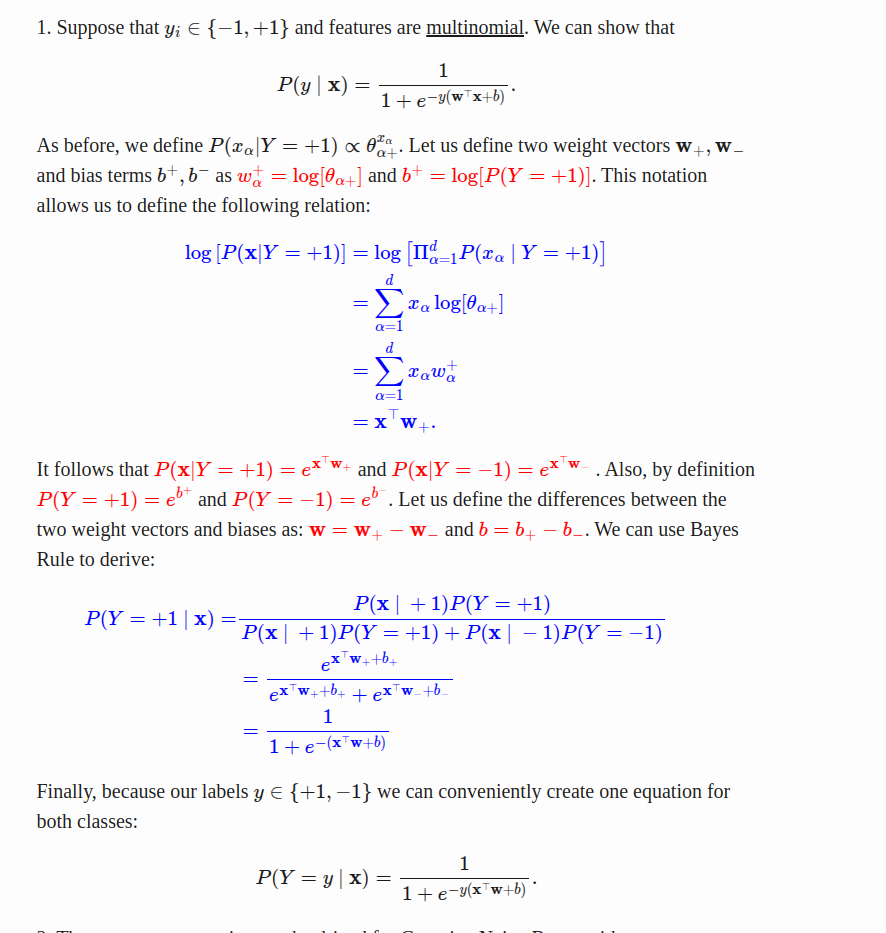

In [4]:
Image(filename='images/naivebayes3.png')